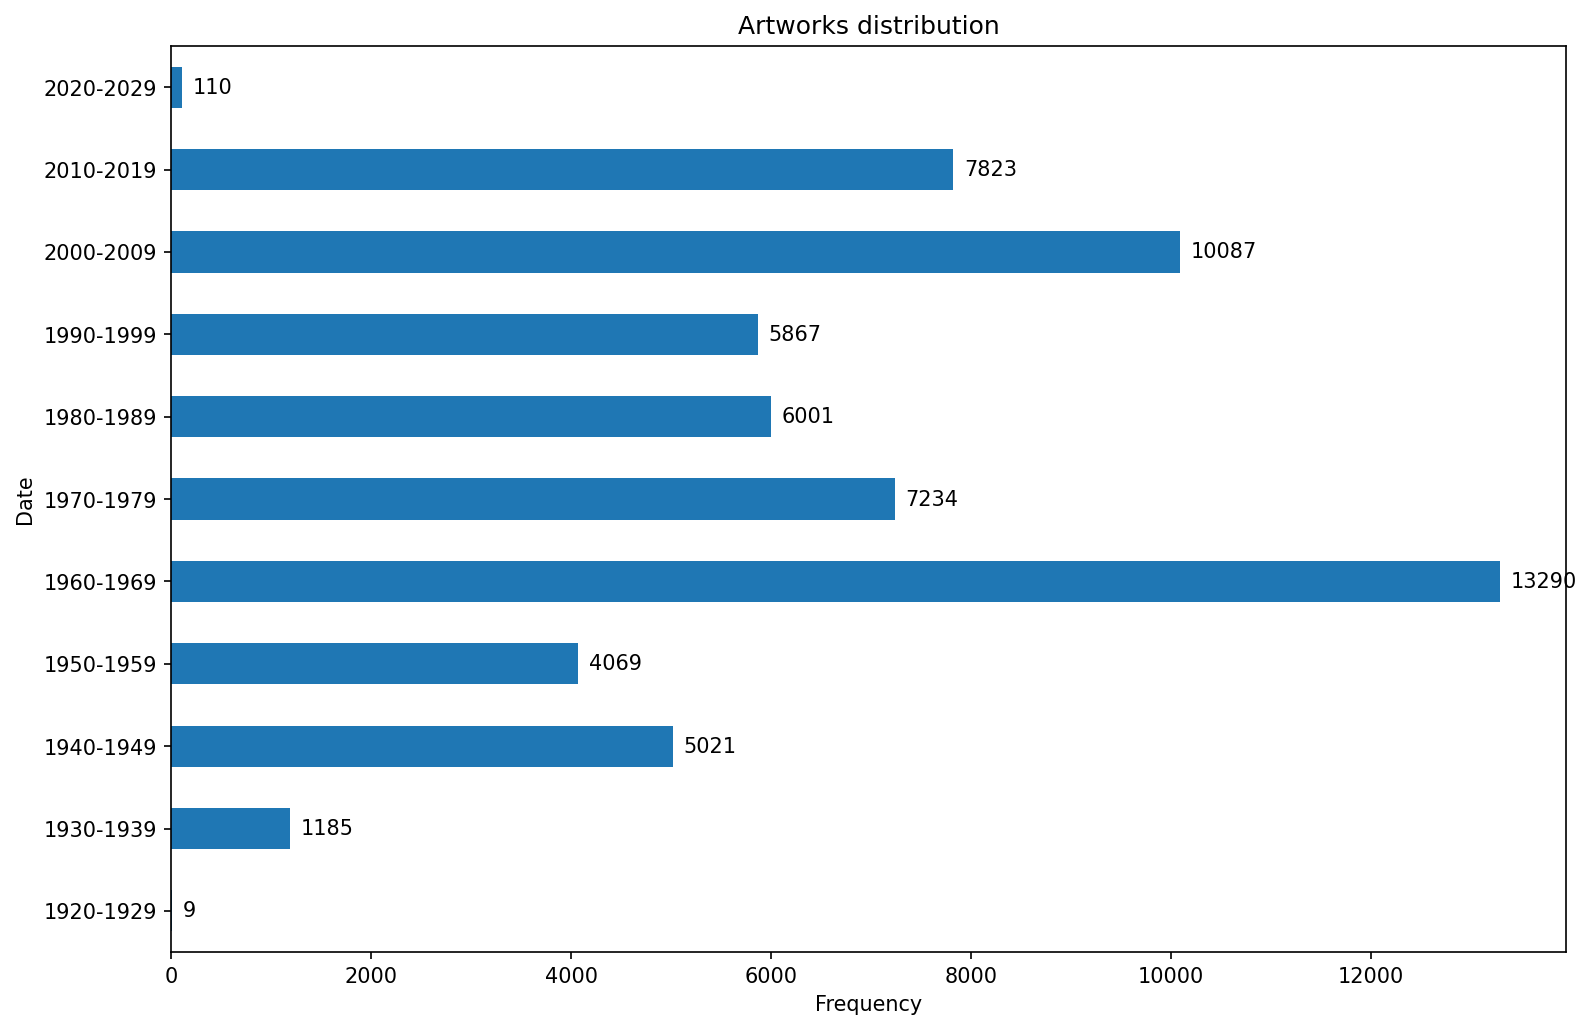

In [13]:
import csv
import matplotlib.pyplot as plt
import pandas as pd


with open(r"C:\Users\Lenovo\PycharmProjects\data-product\product_output\11232021\Artworks_clean_prod.csv", encoding="utf8") as csvfile:

    data_list=list(csv.reader(csvfile))
    totalSubs = {}
    Subjects = []
    Scores = []

    datesdictionary = {}
    dates = []
    title_per_date = []
    for row in data_list[1:]:
        if row[5] in totalSubs:
            totalSubs[row[5]]+=1
        else:
            totalSubs[row[5]] =1

        if row[7]!='':
            date=(int(float(row[7])))
            if date!="":
                date=date-int(date%10)
                if date in datesdictionary:
                    datesdictionary[date]+=1
                else:
                    datesdictionary[date]=1

    for elem in totalSubs:
        Subjects.append(elem)
        Scores.append(totalSubs[elem])

    for elem in sorted(datesdictionary):
        currdate=str(elem)+"-"+str(int(elem)+9)
        dates.append(currdate)
        title_per_date.append(datesdictionary[elem])



    frequencies=title_per_date

    freq_series=pd.Series(frequencies)

    y_labels=dates

    #plot the figure
    plt.figure(figsize=(12,8))
    ax=freq_series.plot(kind='barh')
    ax.set_title('Artworks distribution')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Date')
    ax.set_yticklabels(y_labels)

    rects=ax.patches

    #for each bar: place a label
    for rect in rects:
        #get x and y placement of label from rect
        x_value=rect.get_width()
        y_value=rect.get_y()+rect.get_height()/2

        #number of points between bar and label
        space=5
        #vertical alignment for positive values
        ha='left'

        #if value of bar is negative: place label left of bar
        if x_value<0:
            #invert space to place label to the left
            space*=-1
            #horizontaly align label at right
            ha='right'

        #use x value as label and format number with 0 decimal place
        label="{:.0f}".format(x_value)

        #create annotation
        plt.annotate(
            label,
            (x_value,y_value),
            xytext=(space,0),
            textcoords="offset points",
            va='center',
            ha=ha
        )
    plt.show()
    #plt.savefig('image.png')

In [12]:
%matplotlib inline
import sys
from os import path
import pathlib
from os import walk
import os
import pandas as pd
import numpy as np

data=pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\data-product\product_output\11232021\Artworks_clean_prod.csv")
gender=data.groupby(['Gender']).size().reset_index(name='counts')
scores=gender['counts']
subjects = gender['Gender']
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import random
import numpy
from matplotlib import pyplot
import ipywidgets as widgets
rands = np.random.rand(100)

c = data['Gender'].loc[data.apply(lambda x: x.Gender in ['Male'], axis=1)]
y = data['Gender'].loc[data.apply(lambda y: y.Gender in ['Female'], axis=1)]
z = data['Gender'].loc[data.apply(lambda z: z.Gender in ['Gender Unknown/Other'], axis=1)]
bins = numpy.linspace(-10, 10, 100)

def f(x):
    if x=="Female":
            pyplot.hist(y, bins=4,alpha=1, label='Female',color = "skyblue", ec="skyblue",edgecolor='red',
              linewidth=1)
            pyplot.legend(loc='lower left')
            plt.title("Female")
            pyplot.show()
    elif x=="Male":
            pyplot.hist(c, bins=4,alpha=1, label='Male',color = "red", ec="red",edgecolor='orange',
              linewidth=1)
            pyplot.legend(loc='lower left')
            plt.title("Male")
            pyplot.show()
    elif x=="Gender Unknown/Other":
            pyplot.hist(z, bins=4,alpha=1, label=f'Gender Unknown/Other',color = "orange", ec="orange",edgecolor='blue',
              linewidth=1)
            pyplot.legend(loc='lower left')
            plt.title("Gender Unknown/Other")
            pyplot.show()
    else:
            pyplot.hist(y, bins=4,alpha=1, label='Female',color = "skyblue", ec="skyblue",edgecolor='red',
              linewidth=1)
            pyplot.hist(z, bins=4,alpha=1, label=f'Gender Unknown/Other',color = "orange", ec="orange",edgecolor='blue',
              linewidth=1)
            pyplot.hist(c, bins=4,alpha=1, label='Male',color = "red", ec="red",edgecolor='orange',
              linewidth=1)
            pyplot.legend(loc='lower right')
            plt.title("Gender")
            plt.legend(
        labels=scores,
        prop={'size': 11},
        loc='best'
    )
            pyplot.show()
            

interact(f, x=["All",subjects[0],subjects[1],subjects[2]]) 


interactive(children=(Dropdown(description='x', options=('All', 'Female', 'Gender Unknown/Other', 'Male'), val…

<function __main__.f(x)>

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_13648/2838438292.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


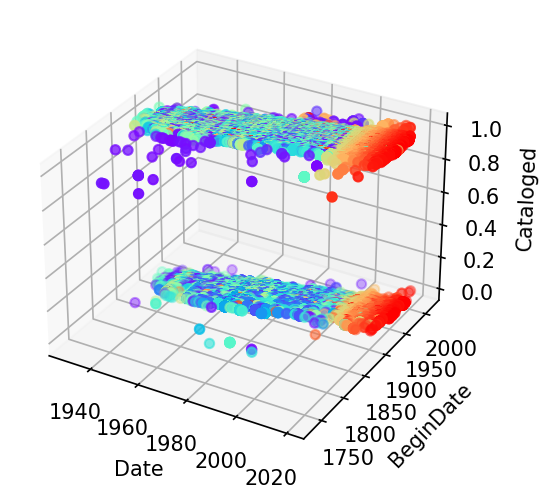

In [11]:
data=pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\data-product\product_output\11232021\Artworks_clean_prod.csv")
threedee = plt.figure().gca(projection='3d')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = ['red' if wt == 'red' else 'yellow' for wt in list(data['BeginDate'])]
import matplotlib.cm as cm


colors = cm.rainbow(np.linspace(0, 1, data.shape[0]))


threedee.scatter(data['Date'], data['BeginDate'], data['Cataloged'],c=colors)
threedee.set_xlabel('Date')
threedee.set_ylabel('BeginDate')
threedee.set_zlabel('Cataloged')
plt.show()